In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")
%matplotlib inline

In [2]:
data_dir = "/Users/maxverbiest/PhD/projects/genotype_strs/data/fotsing_data/"
df_estrs = pd.read_csv(data_dir + "fotsing_etal_data_sheet_hg38_tral_panel.tsv", header = None, sep="\t")
df_estrs['tmp_id'] = df_estrs.apply(lambda row: f"{row[12]}_{row[13]}", axis = 1)
df_estrs.drop([12, 13, 14, 15, 17, 18], axis=1, inplace=True)
df_estrs.columns = [
  "chr",
  "start",
  "end",
  "gene_id",
  "gene_name",
  "tissue_hits",
  "beta_max",
  "tissue_info",
  "pval",
  "CAVIAR_score",
  "unit_fw",
  "unit_rv",
  "unit_panel",
  "panel_overlap",
  "tmp_id"
]

In [4]:
# df_estrs.to_csv(f"{data_dir}fotsing_etal_tmp_id_mapping.tsv", sep="\t", index=False)

In [3]:
print(df_estrs.info())
df_estrs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22393 entries, 0 to 22392
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   chr            22393 non-null  object 
 1   start          22393 non-null  int64  
 2   end            22393 non-null  int64  
 3   gene_id        22393 non-null  object 
 4   gene_name      22393 non-null  object 
 5   tissue_hits    22393 non-null  int64  
 6   beta_max       22393 non-null  float64
 7   tissue_info    22393 non-null  object 
 8   pval           22393 non-null  float64
 9   CAVIAR_score   22347 non-null  float64
 10  unit_fw        22393 non-null  object 
 11  unit_rv        22393 non-null  object 
 12  unit_panel     22393 non-null  object 
 13  panel_overlap  22393 non-null  int64  
 14  tmp_id         22393 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 2.6+ MB
None


,start,end,tissue_hits,beta_max,pval,CAVIAR_score,panel_overlap
count,2.239300e+04,2.239300e+04,22393.000000,22393.000000,2.239300e+04,2.234700e+04,22393.000000
mean,7.453439e+07,7.453442e+07,1.981155,0.004186,3.152115e-04,7.148528e-02,19.111017
std,5.566473e+07,5.566473e+07,2.146705,0.319096,6.417859e-04,1.365815e-01,10.788728
min,4.949300e+04,4.950400e+04,1.000000,-0.842330,1.020000e-69,7.950000e-16,1.000000
25%,3.262554e+07,3.262557e+07,1.000000,-0.271403,2.630000e-07,9.636540e-03,11.000000
50%,6.058528e+07,6.058533e+07,1.000000,0.180656,4.800000e-05,2.422930e-02,15.000000
75%,1.095858e+08,1.095858e+08,2.000000,0.273124,3.961950e-04,6.501635e-02,24.000000
max,2.489043e+08,2.489043e+08,17.000000,0.814063,2.584264e-02,1.000000e+00,91.000000


In [4]:
df_estrs.head()

,chr,start,end,gene_id,gene_name,tissue_hits,beta_max,tissue_info,pval,CAVIAR_score,unit_fw,unit_rv,unit_panel,panel_overlap,tmp_id
0,chr1,950660,950671,ENSG00000187583,PLEKHN1,2,-0.226886,Cells-Transformedfibroblasts_-0.22_0.01;Nerve-...,2.068940e-04,0.040808,AC,GT,CA,11,chr1_950660
1,chr1,950660,950671,ENSG00000187961,KLHL17,1,-0.195615,Esophagus-Mucosa_-0.20_0.01,1.733056e-03,0.010497,AC,GT,CA,11,chr1_950660
2,chr1,950660,950671,ENSG00000188976,NOC2L,5,0.312156,Artery-Tibial_0.19_0.01;Lung_0.20_0.07;Nerve-T...,4.350000e-08,0.103870,AC,GT,CA,11,chr1_950660
3,chr1,965304,965346,ENSG00000187642,C1orf170,1,-0.252924,Esophagus-Muscularis_-0.25_0.01,1.911650e-04,0.012421,ATTT,AAAT,TTTA,11,chr1_965316
4,chr1,1002183,1002202,ENSG00000187608,ISG15,2,0.208372,Artery-Tibial_0.21_0.05;Nerve-Tibial_0.19_0.08,6.725450e-04,0.082017,T,A,T,19,chr1_1002183


In [5]:
def get_consensus_unit(unit: str) -> str:
    """ Determine all circular permutations of input unit, sort alphabetically and return the 
    first permutation. e.g. TTTA -> ['TTTA', 'TTAT', 'TATT', 'ATTT'] -> ATTT
    """
    unit2 = unit + unit
    permutations = []

    for i in range(0, len(unit)):
         permutations.append( unit2[i : i+len(unit)] )
            
    return sorted(permutations)[0]

In [6]:
df_estrs.loc[:, 'unit_panel'] = df_estrs.apply(lambda row: get_consensus_unit(row.unit_panel), axis=1)

In [7]:
df_estrs.head()

,chr,start,end,gene_id,gene_name,tissue_hits,beta_max,tissue_info,pval,CAVIAR_score,unit_fw,unit_rv,unit_panel,panel_overlap,tmp_id
0,chr1,950660,950671,ENSG00000187583,PLEKHN1,2,-0.226886,Cells-Transformedfibroblasts_-0.22_0.01;Nerve-...,2.068940e-04,0.040808,AC,GT,AC,11,chr1_950660
1,chr1,950660,950671,ENSG00000187961,KLHL17,1,-0.195615,Esophagus-Mucosa_-0.20_0.01,1.733056e-03,0.010497,AC,GT,AC,11,chr1_950660
2,chr1,950660,950671,ENSG00000188976,NOC2L,5,0.312156,Artery-Tibial_0.19_0.01;Lung_0.20_0.07;Nerve-T...,4.350000e-08,0.103870,AC,GT,AC,11,chr1_950660
3,chr1,965304,965346,ENSG00000187642,C1orf170,1,-0.252924,Esophagus-Muscularis_-0.25_0.01,1.911650e-04,0.012421,ATTT,AAAT,ATTT,11,chr1_965316
4,chr1,1002183,1002202,ENSG00000187608,ISG15,2,0.208372,Artery-Tibial_0.21_0.05;Nerve-Tibial_0.19_0.08,6.725450e-04,0.082017,T,A,T,19,chr1_1002183


In [13]:
df_str_info = pd.read_csv(
    "/Users/maxverbiest/PhD/data/str_panels/tral_and_perf_panel_meta_info.tsv",
    sep="\t"
)
df_patient_variation_filt = pd.read_csv(
    "/Users/maxverbiest/PhD/projects/genotype_strs/results/oxana_variation/patient_variation_wide_blood_filt.csv",
    sep=","
)

In [14]:
print(df_patient_variation_filt.patient.nunique())
df_patient_variation_filt

157


,tmp_id,repeat_id,chr,start,end,period,ref,patient,allele_a_healthy,allele_b_healthy,allele_a_tumor,allele_b_tumor,patient_len_diff
0,chr10_100749706,223937.0,chr10,100749706,100749713,2,4,TCGA-A6-2674,4,4,4,4,0
1,chr10_101003658,NaN,chr10,101003658,101003672,3,5,TCGA-A6-2674,5,5,5,5,0
2,chr10_101134117,224272.0,chr10,101134117,101134128,4,3,TCGA-A6-2674,3,3,3,3,0
3,chr10_101134204,224213.0,chr10,101134204,101134215,3,4,TCGA-A6-2674,4,4,4,4,0
4,chr10_101580372,224597.0,chr10,101580372,101580379,2,4,TCGA-A6-2674,4,4,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4349138,chrY_2961438,1236701.0,chrY,2961438,2961445,2,4,TCGA-QG-A5Z2,4,4,4,4,0
4349139,chrY_2976735,1236685.0,chrY,2976735,2976746,3,4,TCGA-QG-A5Z2,4,4,4,4,0
4349140,chrY_6868982,1237691.0,chrY,6868982,6868989,2,4,TCGA-QG-A5Z2,4,4,4,4,0
4349141,chrY_7024972,1237731.0,chrY,7024972,7024979,2,4,TCGA-QG-A5Z2,4,4,4,4,0


In [15]:
# df_patient_variation_filt = (
#     df_patient_variation
#         .merge(df_str_info, how="left", on="tmp_id", suffixes=(None, "_tmp"))
#         .query("not in_segdup and neighbour_type == 'no_neighbour' and period > 1")
#         .loc[:, df_patient_variation.columns] 
# )


df_patient_variation_filt = (
    df_patient_variation_filt
        .groupby('patient')
        .filter(lambda x: len(x) > 5000)
        .reset_index()
        .drop("index", axis=1)
)

print(df_patient_variation_filt['patient'].nunique())
df_patient_variation_filt.describe()

137


,repeat_id,start,end,period,ref,allele_a_healthy,allele_b_healthy,allele_a_tumor,allele_b_tumor,patient_len_diff
count,4.007895e+06,4.281871e+06,4.281871e+06,4.281871e+06,4.281871e+06,4.281871e+06,4.281871e+06,4.281871e+06,4.281871e+06,4.281871e+06
mean,7.665270e+05,8.023658e+07,8.023659e+07,2.192871e+00,6.686502e+00,6.605447e+00,6.633641e+00,6.571741e+00,6.607956e+00,1.912059e-01
std,4.472002e+05,5.677642e+07,5.677642e+07,1.108283e+00,4.568258e+00,4.386314e+00,4.468222e+00,4.334652e+00,4.429091e+00,9.457584e-01
min,5.000000e+00,2.080000e+02,2.190000e+02,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.813340e+05,3.570591e+07,3.570592e+07,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00
50%,7.503710e+05,6.790948e+07,6.790948e+07,2.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00
75%,1.167266e+06,1.171939e+08,1.171939e+08,2.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,0.000000e+00
max,1.548898e+06,2.489196e+08,2.489196e+08,6.000000e+00,5.000000e+01,5.100000e+01,3.850000e+02,5.000000e+01,7.700000e+01,3.600000e+02


In [16]:
df_patient_variation_filt.head()

,tmp_id,repeat_id,chr,start,end,period,ref,patient,allele_a_healthy,allele_b_healthy,allele_a_tumor,allele_b_tumor,patient_len_diff
0,chr10_100042463,223515.0,chr10,100042463,100042474,4,3,TCGA-A6-2675,3,3,3,3,0
1,chr10_100069930,223540.0,chr10,100069930,100069939,1,10,TCGA-A6-2675,9,9,10,10,2
2,chr10_1000869,166716.0,chr10,1000869,1000876,2,4,TCGA-A6-2675,4,4,4,4,0
3,chr10_100152407,NaN,chr10,100152407,100152414,2,4,TCGA-A6-2675,4,4,4,4,0
4,chr10_100222837,223655.0,chr10,100222837,100222844,2,4,TCGA-A6-2675,4,4,4,4,0


In [17]:
df_in_estr = (
    df_patient_variation_filt[
        df_patient_variation_filt["tmp_id"]
            .isin(df_estrs["tmp_id"].unique())
    ]
)

print(df_in_estr.shape)
df_in_estr.head()

(35610, 13)


,tmp_id,repeat_id,chr,start,end,period,ref,patient,allele_a_healthy,allele_b_healthy,allele_a_tumor,allele_b_tumor,patient_len_diff
93,chr10_102714290,225936.0,chr10,102714290,102714310,3,7,TCGA-A6-2675,7,7,7,7,0
368,chr10_122429495,235989.0,chr10,122429495,122429530,2,18,TCGA-A6-2675,17,17,17,17,0
420,chr10_125841188,237708.0,chr10,125841188,125841203,2,8,TCGA-A6-2675,9,9,9,9,0
513,chr10_133402250,241196.0,chr10,133402250,133402285,6,6,TCGA-A6-2675,5,5,5,5,0
684,chr10_32804931,185336.0,chr10,32804931,32804952,2,11,TCGA-A6-2675,11,11,11,11,0


In [19]:
df_in_estr_variable = (
    df_in_estr[df_in_estr["patient_len_diff"] > 0]
)
print(df_in_estr_variable.shape)
df_in_estr_variable.head()

(7016, 13)


,tmp_id,repeat_id,chr,start,end,period,ref,patient,allele_a_healthy,allele_b_healthy,allele_a_tumor,allele_b_tumor,patient_len_diff
768,chr10_49326925,190648.0,chr10,49326925,49326962,2,19,TCGA-A6-2675,23,29,24,24,6
1380,chr11_104950798,421808.0,chr11,104950798,104950823,2,13,TCGA-A6-2675,14,16,16,17,1
1408,chr11_107816016,423258.0,chr11,107816016,107816053,2,19,TCGA-A6-2675,17,17,18,21,5
1464,chr11_111809518,425427.0,chr11,111809518,111809539,2,11,TCGA-A6-2675,10,10,11,11,2
1768,chr11_125908180,433359.0,chr11,125908180,125908190,1,11,TCGA-A6-2675,10,10,10,9,1


In [21]:
df_in_estr_variable = (
    df_in_estr_variable
        .merge(df_estrs.loc[:, ['tmp_id', 'gene_name', 'beta_max', 'CAVIAR_score']], on="tmp_id")
)
print(df_in_estr_variable.shape)
df_in_estr_variable.head()

(9305, 16)


,tmp_id,repeat_id,chr,start,end,period,ref,patient,allele_a_healthy,allele_b_healthy,allele_a_tumor,allele_b_tumor,patient_len_diff,gene_name,beta_max,CAVIAR_score
0,chr10_49326925,190648.0,chr10,49326925,49326962,2,19,TCGA-A6-2675,23,29,24,24,6,DRGX,0.230836,0.001769
1,chr10_49326925,190648.0,chr10,49326925,49326962,2,19,TCGA-A6-3808,24,28,24,33,5,DRGX,0.230836,0.001769
2,chr10_49326925,190648.0,chr10,49326925,49326962,2,19,TCGA-A6-5660,24,33,23,23,11,DRGX,0.230836,0.001769
3,chr10_49326925,190648.0,chr10,49326925,49326962,2,19,TCGA-A6-5666,22,25,24,24,2,DRGX,0.230836,0.001769
4,chr10_49326925,190648.0,chr10,49326925,49326962,2,19,TCGA-A6-6651,24,24,22,28,6,DRGX,0.230836,0.001769


In [22]:
df_in_estr_variable.sort_values(by="CAVIAR_score", ascending=False).head()

,tmp_id,repeat_id,chr,start,end,period,ref,patient,allele_a_healthy,allele_b_healthy,allele_a_tumor,allele_b_tumor,patient_len_diff,gene_name,beta_max,CAVIAR_score
6563,chr3_40462030,690639.0,chr3,40462030,40462059,3,10,TCGA-AA-A01I,15,8,17,8,2,RPL14,-0.361022,0.999949
6544,chr3_40462030,690639.0,chr3,40462030,40462059,3,10,TCGA-A6-5665,12,13,12,12,1,RPL14,-0.361022,0.999949
6562,chr3_40462030,690639.0,chr3,40462030,40462059,3,10,TCGA-AA-A01C,13,20,13,8,12,RPL14,-0.361022,0.999949
6561,chr3_40462030,690639.0,chr3,40462030,40462059,3,10,TCGA-AA-A00O,13,8,13,13,5,RPL14,-0.361022,0.999949
6560,chr3_40462030,690639.0,chr3,40462030,40462059,3,10,TCGA-AA-3858,12,12,12,8,4,RPL14,-0.361022,0.999949


In [25]:
print(df_in_estr_variable[df_in_estr_variable["CAVIAR_score"] > 0.3].shape)
df_in_estr_variable[df_in_estr_variable["CAVIAR_score"] > 0.3].sort_values(by="patient_len_diff", ascending=False)

(552, 16)


,tmp_id,repeat_id,chr,start,end,period,ref,patient,allele_a_healthy,allele_b_healthy,allele_a_tumor,allele_b_tumor,patient_len_diff,gene_name,beta_max,CAVIAR_score
2108,chr20_417396,889284.0,chr20,417396,417423,2,14,TCGA-AG-4005,14,14,22,22,16,RBCK1,0.302919,0.614475
7397,chr3_128813586,740703.0,chr3,128813586,128813619,2,17,TCGA-AG-4005,10,10,17,17,14,RAB7A,0.332947,0.767919
5292,chr6_32155564,15145.0,chr6,32155564,32155617,2,27,TCGA-AA-A024,30,30,23,23,14,PRRT1,-0.301305,0.597232
6185,chr12_50086480,563623.0,chr12,50086480,50086503,3,8,TCGA-AA-3852,8,8,15,15,14,GPD1,0.262743,0.300894
6193,chr12_50086480,563623.0,chr12,50086480,50086503,3,8,TCGA-AG-3883,8,8,14,14,12,GPD1,0.262743,0.300894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553,chr3_40462030,690639.0,chr3,40462030,40462059,3,10,TCGA-AA-3812,15,15,14,15,1,RPL14,-0.361022,0.999949
4628,chr9_136980867,1547811.0,chr9,136980867,136980902,4,9,TCGA-AA-3956,11,11,10,11,1,FBXW5,-0.335319,0.304232
4626,chr9_136980867,1547811.0,chr9,136980867,136980902,4,9,TCGA-AA-3867,10,11,10,10,1,FBXW5,-0.335319,0.304232
4624,chr9_136980867,1547811.0,chr9,136980867,136980902,4,9,TCGA-A6-6780,10,11,10,10,1,FBXW5,-0.335319,0.304232


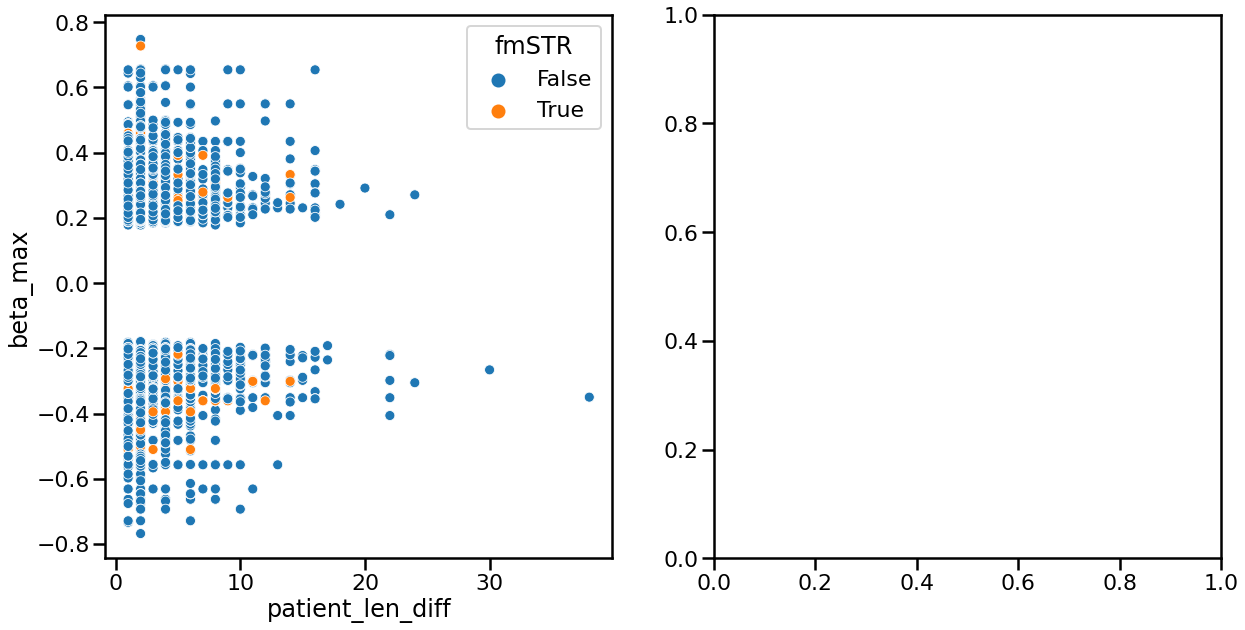

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

sns.scatterplot(
    data=df_in_estr_variable,
    x="patient_len_diff",
    y="beta_max",
    hue=df_in_estr_variable["CAVIAR_score"] > 0.3,
    s=100,
    ax=ax1
)
ax1.legend(title="fmSTR")

In [27]:
df_trusight_genes = pd.read_csv("/Users/maxverbiest/PhD/projects/genotype_strs/data/clinical/trusight_onco_genes.txt", sep="\t", header=None)
df_trusight_genes = df_trusight_genes.loc[:,[0,1]]
df_trusight_genes.columns = ["gene_id", "gene_name"]

df_trusight_genes["gene_id"] = df_trusight_genes.apply(lambda row: row.gene_id.split(".")[0], axis=1)
df_trusight_genes.head()

,gene_id,gene_name
0,ENSG00000097007,ABL1
1,ENSG00000143322,ABL2
2,ENSG00000115170,ACVR1
3,ENSG00000135503,ACVR1B
4,ENSG00000142208,AKT1


In [28]:
df_trusight_genes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   gene_id    523 non-null    object
 1   gene_name  523 non-null    object
dtypes: object(2)
memory usage: 8.3+ KB


In [21]:
df_in_estr

,patient,tmp_id,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,repeat_id,patient_len_diff
13,TCGA-AA-3489,chr1_1752910,10,10,10,10,3,9,1100327,0
459,TCGA-AA-3489,chr1_55058667,16,16,18,19,2,26,1142870,5
497,TCGA-AA-3489,chr1_66643729,7,7,7,7,2,7,1150529,0
646,TCGA-AA-3489,chr1_101021818,21,21,22,22,2,21,1166924,2
673,TCGA-AA-3489,chr1_109759146,16,18,15,17,2,19,1169780,2
...,...,...,...,...,...,...,...,...,...,...
2105797,TCGA-AG-3890,chr19_32606027,6,6,6,6,4,5,.,0
2106440,TCGA-AG-3890,chr5_176943071,4,4,4,4,4,4,.,0
2106453,TCGA-AG-3890,chr5_34042762,6,6,6,6,3,5,.,0
2106575,TCGA-AG-3890,chr6_26384925,3,3,3,3,4,3,.,0


In [29]:
pd.set_option("display.max_rows", 400)
pd.get_option("display.max_rows")

400

In [31]:
# df[df["gene_name"].isin(df_trusight_genes["gene_name"])].sort_values(by="CAVIAR_score", ascending=False).head(n=30)

# df_in_estr_variable.merge(df.loc[:, ["tmp_id", "gene_name", "beta_max", "CAVIAR_score"]], on="tmp_id", how="left").head()
df_in_estr_variable[df_in_estr_variable["gene_name"].isin(df_trusight_genes["gene_name"])].sort_values(by="patient_len_diff", ascending=False)

,tmp_id,repeat_id,chr,start,end,period,ref,patient,allele_a_healthy,allele_b_healthy,allele_a_tumor,allele_b_tumor,patient_len_diff,gene_name,beta_max,CAVIAR_score
6183,chr12_50086480,563623.0,chr12,50086480,50086503,3,8,TCGA-AA-3852,8,8,15,15,14,SMARCD1,-0.240575,0.146725
5452,chr13_48316720,1255628.0,chr13,48316720,48316783,2,32,TCGA-AD-5900,23,23,20,33,13,RB1,0.246637,0.064131
6175,chr12_50086480,563623.0,chr12,50086480,50086503,3,8,TCGA-AA-3679,8,8,14,14,12,SMARCD1,-0.240575,0.146725
6191,chr12_50086480,563623.0,chr12,50086480,50086503,3,8,TCGA-AG-3883,8,8,14,14,12,SMARCD1,-0.240575,0.146725
6171,chr12_50086480,563623.0,chr12,50086480,50086503,3,8,TCGA-A6-5662,14,14,8,8,12,SMARCD1,-0.240575,0.146725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,chr3_142375976,750102.0,chr3,142375976,142376001,2,13,TCGA-CK-5912,15,15,14,15,1,ATR,-0.228902,0.005003
7313,chr1_158611124,1185353.0,chr1,158611124,158611165,6,7,TCGA-AA-3875,3,6,4,6,1,SPTA1,-0.423146,0.042604
7315,chr1_158611124,1185353.0,chr1,158611124,158611165,6,7,TCGA-AA-A00O,3,4,3,3,1,SPTA1,-0.423146,0.042604
906,chr3_142375976,750102.0,chr3,142375976,142376001,2,13,TCGA-AA-3855,14,15,14,14,1,ATR,-0.228902,0.005003


In [38]:
df_in_estr_variable[df_in_estr_variable["gene_name"].isin(df_trusight_genes["gene_name"])].groupby("gene_name").size()
df_in_estr_variable[df_in_estr_variable["CAVIAR_score"] > 0.3].groupby("gene_name").size().sort_values(ascending=False).head(n=50)

gene_name
PRRT1        27
RPL14        27
SNX2         26
ASPRV1       22
COL11A2      20
S100A16      17
RBCK1        16
DHRS1        16
USP33        15
C10orf129    11
RAB7A        10
HSD17B4       9
FBXW5         9
FAH           7
SMPD1         7
SLC35B1       6
GPD1          5
RPL29         5
ANKDD1A       4
RNPEP         3
PCDHGA9       3
MARS2         3
ZNF165        3
KAT8          2
TRAFD1        2
PLEKHF2       1
SIKE1         1
IGFL4         1
UBE2B         1
HSPBP1        1
VPS36         1
dtype: int64

In [41]:
df_in_estr_variable[df_in_estr_variable["gene_name"] == "PRRT1"].sort_values(by="patient_len_diff", ascending=False)

,patient,tmp_id,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,repeat_id,patient_len_diff,gene_name,beta_max,CAVIAR_score
2536,TCGA-AA-3966,chr6_32155564,26,37,27,27,2,27,15145,11,PRRT1,-0.301305,0.597232
2534,TCGA-AA-3856,chr6_32155564,25,30,33,33,2,27,15145,11,PRRT1,-0.301305,0.597232
2533,TCGA-AA-3854,chr6_32155564,24,24,29,29,2,27,15145,10,PRRT1,-0.301305,0.597232
2529,TCGA-AA-3814,chr6_32155564,24,24,28,28,2,27,15145,8,PRRT1,-0.301305,0.597232
2538,TCGA-AA-A00O,chr6_32155564,28,28,25,33,2,27,15145,8,PRRT1,-0.301305,0.597232
2522,TCGA-AA-3672,chr6_32155564,26,31,23,26,2,27,15145,8,PRRT1,-0.301305,0.597232
2524,TCGA-AA-3678,chr6_32155564,18,18,18,26,2,27,15145,8,PRRT1,-0.301305,0.597232
2532,TCGA-AA-3852,chr6_32155564,28,28,24,26,2,27,15145,6,PRRT1,-0.301305,0.597232
2535,TCGA-AA-3949,chr6_32155564,23,23,26,26,2,27,15145,6,PRRT1,-0.301305,0.597232
2516,TCGA-AA-3712,chr6_32155564,29,29,26,26,2,27,15145,6,PRRT1,-0.301305,0.597232


In [36]:
df_piechart = df_in_estr_variable[["patient", "tmp_id", "period"]]
df_piechart.drop_duplicates()

,patient,tmp_id,period
0,TCGA-A6-2675,chr10_49326925,2
1,TCGA-A6-3808,chr10_49326925,2
2,TCGA-A6-5660,chr10_49326925,2
3,TCGA-A6-5666,chr10_49326925,2
4,TCGA-A6-6651,chr10_49326925,2
...,...,...,...
9300,TCGA-CM-4752,chr4_17883655,2
9301,TCGA-QG-A5Z2,chr9_136383543,3
9302,TCGA-QG-A5Z2,chr9_136383543,3
9303,TCGA-QG-A5Z2,chr9_136383543,3


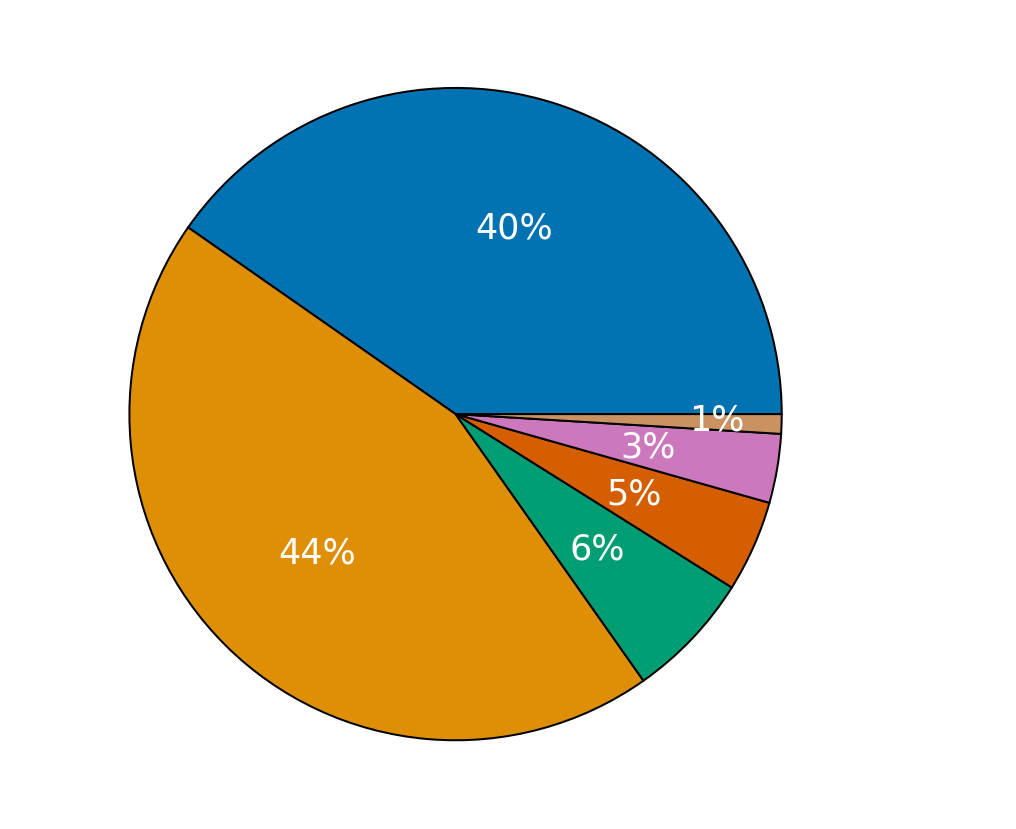

In [63]:
sns.set_context("poster")

plt.rc(
    'font', size=35,
)
plt.rcParams['text.color'] = 'white'

# 'text.color'] = COLOR
# mpl.rcParams['axes.labelcolor'] = COLOR
# mpl.rcParams['xtick.color'] = COLOR
# mpl.rcParams['ytick.color']
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

df_piechart = df_in_estr_variable[["patient", "tmp_id", "period"]]

patches, texts, autotexts = ax.pie(
    df_piechart.groupby("period").size(), 
    labels=df_piechart.groupby("period").size().index, 
    colors=sns.color_palette('colorblind')[0:6],
    autopct='%.0f%%',
    wedgeprops={"edgecolor":"k",'linewidth': 2}
)
autotexts[5]._x = 0.8

for i in texts:
    i._text = f"Unit size: {i._text}"
    i._fontproperties.set_size(35)
    

plt.show()